In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../src/data/OptiTrack/OptrTrack_Cleaned_Flower.csv")

In [3]:
df.head()

,Frame,Time,Top_X,Top_Y,Top_Z,Pendulum_X,Pendulum_Y,Pendulum_Z
0,864,7.200000,-0.007167,1.020277,0.024987,-0.079184,0.377297,0.019315
1,865,7.208333,-0.007063,1.020281,0.024970,-0.051775,0.373227,0.022521
2,866,7.216667,-0.007039,1.020281,0.024958,-0.020289,0.374264,0.024863
3,867,7.225000,-0.007029,1.020272,0.024949,0.009168,0.374767,0.027340
4,868,7.233333,-0.007006,1.020282,0.024945,0.038802,0.376516,0.030440


In [4]:
#df = df.drop(labels=range(0,736))

## Check Dataset

In [5]:
df.head()

,Frame,Time,Top_X,Top_Y,Top_Z,Pendulum_X,Pendulum_Y,Pendulum_Z
0,864,7.200000,-0.007167,1.020277,0.024987,-0.079184,0.377297,0.019315
1,865,7.208333,-0.007063,1.020281,0.024970,-0.051775,0.373227,0.022521
2,866,7.216667,-0.007039,1.020281,0.024958,-0.020289,0.374264,0.024863
3,867,7.225000,-0.007029,1.020272,0.024949,0.009168,0.374767,0.027340
4,868,7.233333,-0.007006,1.020282,0.024945,0.038802,0.376516,0.030440


In [6]:
df.isnull().values.any()

False

In [7]:
df.shape

(13869, 8)

# Process Data

In [8]:
#df['X'] = df['Top_X'] - df['Pendulum_X']
#df['Z'] = df['Pendulum_Z']
df['Y'] = df['Pendulum_Y'] - df['Top_Y']
df['Z'] = df['Pendulum_Z'] - df['Top_Z']
df['X'] = df['Pendulum_X'] - df['Top_X']

In [9]:
df.head()

,Frame,Time,Top_X,Top_Y,Top_Z,Pendulum_X,Pendulum_Y,Pendulum_Z,Y,Z,X
0,864,7.200000,-0.007167,1.020277,0.024987,-0.079184,0.377297,0.019315,-0.642980,-0.005672,-0.072017
1,865,7.208333,-0.007063,1.020281,0.024970,-0.051775,0.373227,0.022521,-0.647054,-0.002449,-0.044712
2,866,7.216667,-0.007039,1.020281,0.024958,-0.020289,0.374264,0.024863,-0.646017,-0.000095,-0.013250
3,867,7.225000,-0.007029,1.020272,0.024949,0.009168,0.374767,0.027340,-0.645505,0.002391,0.016197
4,868,7.233333,-0.007006,1.020282,0.024945,0.038802,0.376516,0.030440,-0.643766,0.005495,0.045808


# Create CSV for Filter

In [10]:
df_export = pd.DataFrame({
    'theta': np.ones(len(df['Frame'].values)),
    'phi': np.ones(len(df['Frame'].values)),
    'dtheta': np.ones(len(df['Frame'].values)),
    'dphi': np.ones(len(df['Frame'].values)),
    'position_x': df['Pendulum_X'].values,
    'position_y': df['Z'].values, 
    'position_z': df['Y'].values, 
    'timestep': df['Time'].values
    
}) 

In [11]:
df_export.to_csv("../src/data/CleanedOptitrack_2.csv")

## Plot Data

In [12]:
%matplotlib inline

(-1.0, 1.0)

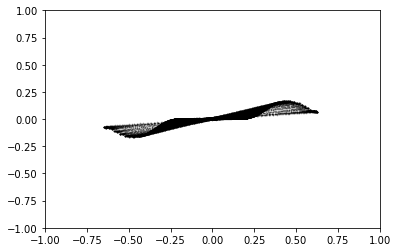

In [13]:
plt.scatter(df["X"], df["Z"], s=0.5, alpha=0.3,color="black")
plt.xlim(-1,1)
plt.ylim(-1,1)

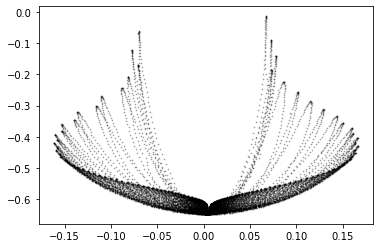

In [14]:
plt.scatter(df["Z"], df["Y"], s=0.5, alpha=0.3,color="black")

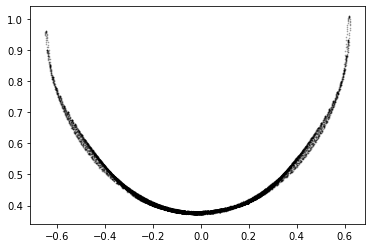

In [15]:
plt.scatter(df["Pendulum_X"],df["Pendulum_Y"], s=0.5, alpha=0.3,color="black")

## 3D-Plot

In [16]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import matplotlib as mpl

In [17]:
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.scatter(df['X'], df['Z'], df['Y'], s=0.4, color="black")

